<Figure size 800x800 with 0 Axes>

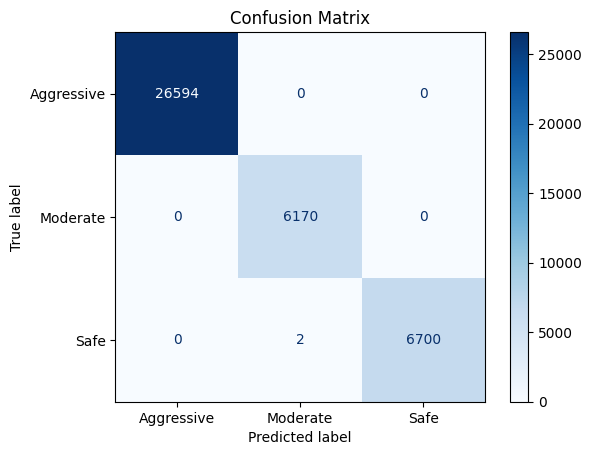

Model Accuracy: 0.9999


In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def evaluate_model(model_path, data_path):
    """Load model, evaluate it, and save confusion matrix plot."""
    model = joblib.load(model_path)
    df = pd.read_csv(data_path)
    
    # Check if 'Category' column exists
    if 'Category' not in df.columns:
        raise KeyError("The 'Category' column is missing from the data.")
    
    X = df.drop(columns=['TripId', 'Category'])
    y = df['Category']
    
    # Check if the model has been fitted and can predict
    if not hasattr(model, 'predict'):
        raise AttributeError("The loaded model is not a fitted estimator.")
    
    y_pred = model.predict(X)
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.savefig('../data/confusion_matrix.png')
    plt.show()
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    return accuracy

if __name__ == "__main__":
    evaluate_model('../models/driving_behavior_model.pkl', '../data/processed_data.csv')
